In [1]:
#import csv
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline


In [2]:
#feature_names = pd.read_csv('../../data/features/feature_names.csv')
#feature_names=['=>','<?php','exit','(',')','array','assert','__construct','file_get_contents','file_put_contents',
#               'totalChars','numbers','base64_decode','alpha','eval','splchars','_POST','die','and','for',
#               'this','as','function','var','do','or','echo','exception','if','list',
#               'while','new','catch','else','continue','case','use','class','include','break',
#               'return','try','public','final','throw','empty','private','print','global','require',
#               'protected','interface','switch','static','benign_mal']


feature_names=['=>','<?php','exit','(',')','array','assert','__construct','file_get_contents','file_put_contents',
               'totalChars','numbers','base64_decode','alpha','eval','splchars','_POST','die','and','for',
              'this','as','function','var','do','or','echo','exception','if','list',
              'while','new','catch','else','continue','case','use','class','include','break',
              'return','try','public','final','throw','empty','private','print','global','require',
              'protected','interface','switch','static',
               'benign_mal']
print(feature_names)

df = pd.read_csv('../../data/features/consolidated.csv', usecols=feature_names)
##print(df['benign_mal'])
x = df.drop('benign_mal', 1)
print(x)
y = df['benign_mal']
print(y)

['=>', '<?php', 'exit', '(', ')', 'array', 'assert', '__construct', 'file_get_contents', 'file_put_contents', 'totalChars', 'numbers', 'base64_decode', 'alpha', 'eval', 'splchars', '_POST', 'die', 'and', 'for', 'this', 'as', 'function', 'var', 'do', 'or', 'echo', 'exception', 'if', 'list', 'while', 'new', 'catch', 'else', 'continue', 'case', 'use', 'class', 'include', 'break', 'return', 'try', 'public', 'final', 'throw', 'empty', 'private', 'print', 'global', 'require', 'protected', 'interface', 'switch', 'static', 'benign_mal']
      <?php  and   or  exception  array   as  break  case  class  continue  \
0       0.0  0.0  0.0        0.0    0.0  0.0    0.0   0.0    0.0       0.0   
1       0.0  1.0  0.0        0.0    0.0  0.0    0.0   0.0    0.0       0.0   
2       0.0  1.0  0.0        0.0    0.0  1.0    0.0   0.0    0.0       0.0   
3       0.0  1.0  0.0        0.0    0.0  0.0    0.0   0.0    0.0       0.0   
4       0.0  2.0  0.0        0.0    0.0  0.0    0.0   0.0    0.0       0.0 

In [3]:
x_train, x_test, y_train, y_test =\
    train_test_split(x, y, test_size=0.3, random_state=0)

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[ 4.46321021, -0.39318448, -0.19808647, ..., -0.08361409,
        -0.07734071, -0.10188679],
       [ 4.46321021, -0.39318448, -0.19808647, ..., -0.08361409,
        -0.07734071, -0.10188679],
       [-0.22405398, -0.39318448, -0.19808647, ..., -0.08406046,
        -0.26506354, -0.09274118],
       ...,
       [-0.22405398, -0.39318448, -0.19808647, ..., -0.08406046,
        -0.62173692, -0.11202649],
       [-0.22405398,  4.75615432, -0.19808647, ..., -0.08316773,
         2.10024415,  0.03032691],
       [-0.22405398,  0.25048287,  2.43022039, ..., -0.08406046,
         1.18040227, -0.0195763 ]])

In [5]:
#model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr',
#                           random_state=0)


In [6]:
model=LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [18]:
x_test = scaler.transform(x_test)
x_test

array([[-0.22405398, -0.39318448, -0.19808647, ..., -0.08406046,
        -0.54664779, -0.10745368],
       [-0.22405398, -0.39318448, -0.19808647, ..., -0.08406046,
        -0.03979614, -0.08478848],
       [-0.22405398,  0.25048287, -0.19808647, ..., -0.08406046,
        -0.22751897, -0.09115064],
       ...,
       [-0.22405398, -0.39318448, -0.19808647, ..., -0.08406046,
         0.56091692, -0.06908189],
       [-0.22405398,  0.25048287, -0.19808647, ..., -0.08406046,
         0.27933268, -0.06411145],
       [-0.22405398,  0.25048287, -0.19808647, ..., -0.08406046,
        -0.50910322, -0.10586314]])

In [23]:
y_pred = model.predict(x_test)
occurrences = np.count_nonzero(y_pred == 1)
occurrences

210

In [9]:
model.score(x_train, y_train)

0.9941348973607038

In [10]:
model.score(x_test, y_test)

0.9904240766073872

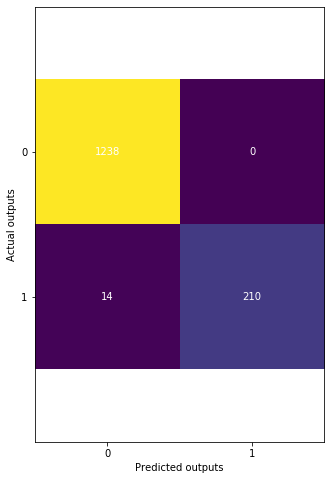

In [11]:
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs',  color='black')
ax.set_ylabel('Actual outputs',  color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(2, -1)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

In [12]:
print(model.coef_)

[[ 0.51088242 -0.20191312 -0.04837398  0.05472392  0.22935582 -0.0973259
  -0.02980928 -0.01822367 -0.01777017 -0.00627957  0.1808548  -0.08750646
   0.05625858  0.0088861  -0.00845751  0.15993937  0.50215913 -0.15070543
   0.1078873  -0.0060234  -0.0291648   0.00449499 -0.02042365 -0.0564725
  -0.00904458 -0.00490337 -0.00997346 -0.00388711  0.01019338 -0.01868712
   0.07442761 -0.03590493 -0.00765108  0.         -0.00320786 -0.01582771
   0.00710703 -0.02097265  0.01663776  0.00505797 -0.12519328  0.16927054
   0.16927054  0.19503692  0.19811787  1.89324264  0.96774963  0.66826777
   0.12255473  0.17354578  0.10193146  0.20313087  0.04016376  0.19318477]]


In [13]:
model.get_params()

{'C': 0.05,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
print(list(zip(model.coef_, )))

[(array([ 0.51088242, -0.20191312, -0.04837398,  0.05472392,  0.22935582,
       -0.0973259 , -0.02980928, -0.01822367, -0.01777017, -0.00627957,
        0.1808548 , -0.08750646,  0.05625858,  0.0088861 , -0.00845751,
        0.15993937,  0.50215913, -0.15070543,  0.1078873 , -0.0060234 ,
       -0.0291648 ,  0.00449499, -0.02042365, -0.0564725 , -0.00904458,
       -0.00490337, -0.00997346, -0.00388711,  0.01019338, -0.01868712,
        0.07442761, -0.03590493, -0.00765108,  0.        , -0.00320786,
       -0.01582771,  0.00710703, -0.02097265,  0.01663776,  0.00505797,
       -0.12519328,  0.16927054,  0.16927054,  0.19503692,  0.19811787,
        1.89324264,  0.96774963,  0.66826777,  0.12255473,  0.17354578,
        0.10193146,  0.20313087,  0.04016376,  0.19318477]),)]


In [15]:
print(model.coef_.shape)

(1, 54)


In [16]:
print(list(zip(feature_names, model.coef_[0])))

[('=>', 0.5108824227067778), ('<?php', -0.2019131214345861), ('exit', -0.04837398429179891), ('(', 0.05472392496482105), (')', 0.22935582187609924), ('array', -0.09732590214578687), ('assert', -0.02980927823789091), ('__construct', -0.018223668397866134), ('file_get_contents', -0.01777017185446881), ('file_put_contents', -0.0062795674836773965), ('totalChars', 0.18085479591708392), ('numbers', -0.08750646225719434), ('base64_decode', 0.056258580535052324), ('alpha', 0.008886098744336221), ('eval', -0.008457513536310522), ('splchars', 0.1599393656712052), ('_POST', 0.5021591265477888), ('die', -0.15070543163471162), ('and', 0.10788730247078646), ('for', -0.006023397260697716), ('this', -0.029164797153070007), ('as', 0.004494987044865556), ('function', -0.02042364665722594), ('var', -0.05647250151237701), ('do', -0.009044584281826201), ('or', -0.004903371309410356), ('echo', -0.009973462045474077), ('exception', -0.0038871113940084573), ('if', 0.010193383497197473), ('list', -0.018687121